<a href="https://colab.research.google.com/github/jsrader77014/MachineLearing/blob/master/StockMarket/Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
!pip install mpl_finance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

In [27]:
ticker ='HFC'

#read the file
df = pd.read_csv(ticker + '.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-14,48.130001,48.130001,45.720001,45.770000,38.331890,2412500
1,2015-09-15,46.009998,46.779999,45.439999,46.619999,39.043751,2998300
2,2015-09-16,46.490002,46.650002,44.900002,45.340000,37.971764,3861100
3,2015-09-17,45.439999,47.939999,44.930000,46.590000,39.018631,5946000
4,2015-09-18,46.220001,47.549999,45.880001,46.720001,39.127499,5491400


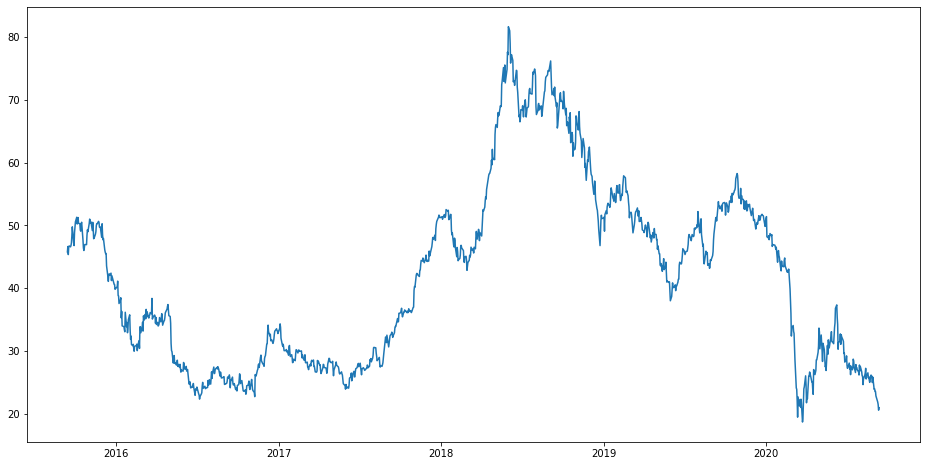

In [28]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [29]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])


In [30]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [31]:
new_data

,Date,Close
0,2015-09-14 00:00:00,45.77
1,2015-09-15 00:00:00,46.62
2,2015-09-16 00:00:00,45.34
3,2015-09-17 00:00:00,46.59
4,2015-09-18 00:00:00,46.72
...,...,...
1254,2020-09-04 00:00:00,22.82
1255,2020-09-08 00:00:00,21.85
1256,2020-09-09 00:00:00,21.46
1257,2020-09-10 00:00:00,20.55


In [33]:
# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:int(len(new_data)*.8)]
valid = new_data[int(len(new_data)*.8):]

In [34]:
# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of training set:
(1007, 2)

 Shape of validation set:
(252, 2)


In [35]:
# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [36]:
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)



 RMSE value on validation set:
15.873708279301498


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


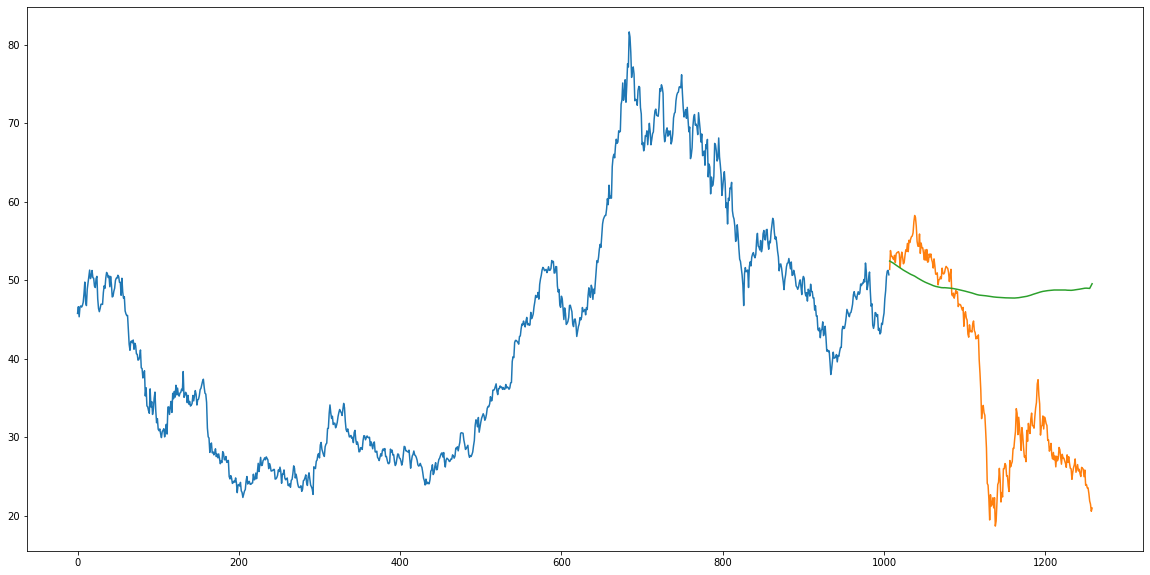

In [38]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])

plt.plot(valid[['Close', 'Predictions']])